# A PCA example

In [11]:
import numpy as np
leaf =np.loadtxt('/home/marianne/Downloads/leaf.csv', delimiter=',')
import pandas as pd
df_leaf=pd.DataFrame(np.array([leaf[:,4],leaf[:,7]]).T,
                   columns=['Elongation', 'Isoperimetric factor'])
df_leaf

,Elongation,Isoperimetric factor
0,0.32396,0.835920
1,0.36116,0.798670
2,0.38998,0.808120
3,0.35376,0.816970
4,0.44462,0.754930
...,...,...
335,0.81725,0.125230
336,0.75319,0.136860
337,0.78147,0.135030
338,0.71532,0.157470


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(leaf[:,4],leaf[:,7])
plt.show()

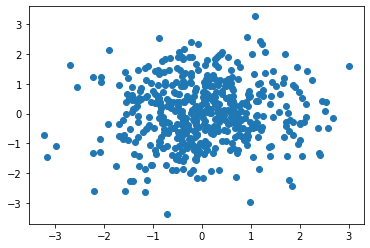

In [5]:
rndn = np.random.randn(500,2)
fig, ax = plt.subplots()
ax.scatter(rndn[:,0],rndn[:,1])
plt.show()

# Import of iris dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df_iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Separate explicative variables from target

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df_iris.loc[:, features].values

# Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

PCA with Python 

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)


In [7]:
principalDf = pd.DataFrame(data =principalComponents, columns = ['principal component1', 'principal component 2'])

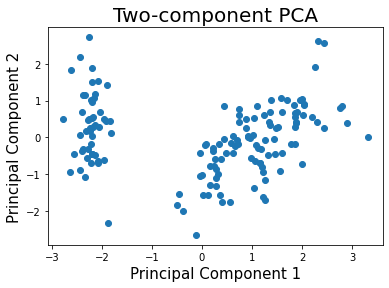

In [9]:
fig, ax = plt.subplots()
ax.scatter(principalComponents[:,0],principalComponents[:,1])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)
plt.show()

In [10]:
finalDf = pd.concat([principalDf, df[['target']]],axis = 1)
targets = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']

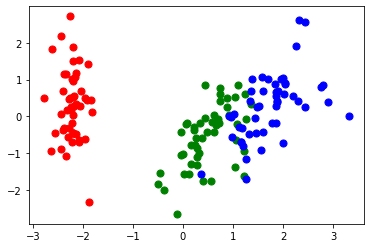

In [12]:
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    x=finalDf[indicesToKeep]['principal component1'].to_numpy()
    y=finalDf[indicesToKeep]['principal component 2'].to_numpy()
    ax.scatter(x, y, c = color, s = 50)


# Comparison between PCA and t-SNE

# Dataset digits

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [9]:
data_X = digits.data[:600]
y = digits.target[:600]

In [10]:
data_X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.],
       [ 0.,  0.,  1., ..., 16., 16.,  8.]])

# Test PCA

In [16]:
pca = PCA(n_components=2)
pca_obj=pca.fit_transform(data_X)

In [17]:
pca_df = pd.DataFrame({'Xpca':pca_obj[:,0],
                        'Ypca':pca_obj[:,1],
                        'digit':y})
pca_df.head()

,Xpca,Ypca,digit
0,-18.883534,2.293901,0
1,21.814216,0.110363,1
2,12.952824,3.437547,2
3,-10.212207,-8.320967,3
4,15.606466,14.933914,4


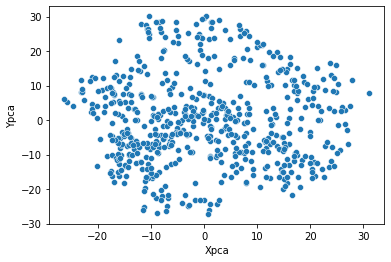

In [18]:
import seaborn as sns
sns.scatterplot(x="Xpca", y="Ypca",
              data=pca_df);

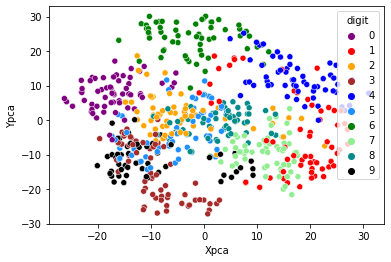

In [19]:
sns.scatterplot(x="Xpca", y="Ypca",
              hue="digit",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=pca_df);

# Test t-SNE

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [21]:
tsne_obj= tsne.fit_transform(data_X)
tsne_df = pd.DataFrame({'Xtsne':tsne_obj[:,0],
                        'Ytsne':tsne_obj[:,1],
                        'digit':y})
tsne_df.head()

,Xtsne,Ytsne,digit
0,32.482109,-25.342215,0
1,-19.354441,-4.162836,1
2,-14.874006,3.263016,2
3,23.132765,5.447344,3
4,-32.922100,0.126765,4


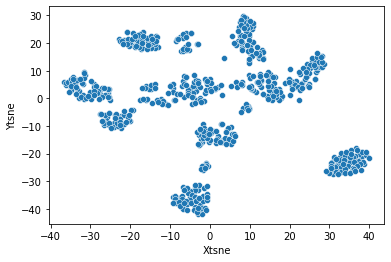

In [22]:
sns.scatterplot(x="Xtsne", y="Ytsne",
              data=tsne_df);

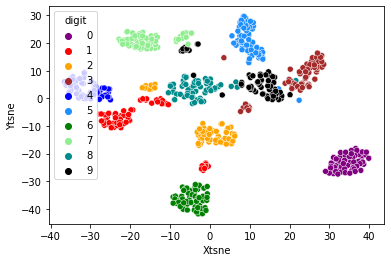

In [23]:
sns.scatterplot(x="Xtsne", y="Ytsne",
              hue="digit",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=tsne_df);